In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../data/crc_raw/cBioPortal_files/data_clinical_supp_survival_treatment.txt', sep='\t')
#skip for the lines 0 to 4
data = data.iloc[5:]
data.head(10)

,#Patient Identifier,"Months from start of Bevacizumab, Capecitabine","Months from start of Bevacizumab, Capecitabine.1","Months from start of Bevacizumab, Capecitabine.2","OS Status from start of Bevacizumab, Capecitabine","PFS-I Status from start of Bevacizumab, Capecitabine","PFS-M Status from start of Bevacizumab, Capecitabine","Months from start of Bevacizumab, Fluorouracil, Irinotecan Hydrochloride, Leucovorin Calcium","Months from start of Bevacizumab, Fluorouracil, Irinotecan Hydrochloride, Leucovorin Calcium.1","Months from start of Bevacizumab, Fluorouracil, Irinotecan Hydrochloride, Leucovorin Calcium.2",...,Months from start of Regorafenib.2,OS Status from start of Regorafenib,PFS-I Status from start of Regorafenib,PFS-M Status from start of Regorafenib,Months from start of Trifluridine and Tipiracil Hydrochloride,Months from start of Trifluridine and Tipiracil Hydrochloride.1,Months from start of Trifluridine and Tipiracil Hydrochloride.2,OS Status from start of Trifluridine and Tipiracil Hydrochloride,PFS-I Status from start of Trifluridine and Tipiracil Hydrochloride,PFS-M Status from start of Trifluridine and Tipiracil Hydrochloride
5,GENIE-VICC-442733,28.9144736842105,8.42105263157895,7.69736842105263,1:DECEASED,0:LIVING,1:DECEASED,14.7368421052632,5.42763157894737,5.52631578947368,...,2.07236842105263,1:DECEASED,1:DECEASED,1:DECEASED,NaN,NaN,NaN,NaN,NaN,NaN
6,GENIE-VICC-183854,6.05263157894737,1.61184210526316,1.84210526315789,0:LIVING,1:DECEASED,1:DECEASED,12.3026315789474,6.25,6.25,...,NaN,NaN,NaN,NaN,0.756578947368421,0.756578947368421,0.756578947368421,0:LIVING,0:LIVING,0:LIVING
7,GENIE-DFCI-008624,12.1710526315789,1.44736842105263,2.63157894736842,1:DECEASED,1:DECEASED,0:LIVING,9.53947368421053,2.23684210526316,3.68421052631579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,GENIE-MSK-P-0016030,15.8881578947368,7.92763157894737,8.45394736842105,1:DECEASED,1:DECEASED,0:LIVING,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,GENIE-MSK-P-0007600,31.4473684210526,5.29605263157895,5.29605263157895,1:DECEASED,0:LIVING,0:LIVING,20.625,8.35526315789474,8.28947368421053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,GENIE-MSK-P-0006138,17.6315789473684,2.26973684210526,2.26973684210526,1:DECEASED,0:LIVING,0:LIVING,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,GENIE-MSK-P-0006271,30.2631578947368,6.11842105263158,6.11842105263158,1:DECEASED,0:LIVING,0:LIVING,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,GENIE-MSK-P-0018721,35.1644736842105,18.4539473684211,18.4539473684211,0:LIVING,0:LIVING,0:LIVING,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,GENIE-MSK-P-0016937,44.3421052631579,23.0921052631579,23.0592105263158,0:LIVING,1:DECEASED,1:DECEASED,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,GENIE-DFCI-002643,21.2828947368421,13.5526315789474,13.5855263157895,1:DECEASED,1:DECEASED,0:LIVING,7.69736842105263,3.94736842105263,4.375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(1306, 121)

In [4]:
data['PFS-I Status from start of Regorafenib'].value_counts()

PFS-I Status from start of Regorafenib
1:DECEASED    79
0:LIVING      16
Name: count, dtype: int64

In [5]:
data['PFS-M Status from start of Regorafenib'].value_counts()

PFS-M Status from start of Regorafenib
1:DECEASED    66
0:LIVING      29
Name: count, dtype: int64

In [6]:
reg_out = data[['#Patient Identifier', 'PFS-I Status from start of Regorafenib', 'PFS-M Status from start of Regorafenib']]
reg_out.dropna(subset=['PFS-I Status from start of Regorafenib', 'PFS-M Status from start of Regorafenib'], inplace=True)
reg_out.shape

/tmp/ipykernel_2832546/2958963979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_out.dropna(subset=['PFS-I Status from start of Regorafenib', 'PFS-M Status from start of Regorafenib'], inplace=True)


(95, 3)

In [7]:
other_out = pd.read_csv('../data/crc_raw/CRC_2.0-public_clinical_data/regimen_cancer_level_dataset.csv')
other_out['drugs_combined'] = other_out[['drugs_drug_1', 'drugs_drug_2', 'drugs_drug_3', 'drugs_drug_4', 'drugs_drug_5']].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
other_out['drugs_combined'].value_counts()

drugs_combined
Fluorouracil(5FU,5Fluorouracil,5Fluracil,AccuSite,Adrucil,Carac,Fluouracil,Flurablastin,Fluracedyl,Fluracil,Fluril,Fluroblastin,Ribofluor,Ro29757),Leucovorin Calcium(Calfolex,Calinat,Cehafolin,Citofolin,Citrec,Citrovorum Factor,Cromatonbic Folinico,Dalisol,Disintox,Divical,Ecofol,Emovis,FOLIcell,Flynoken A,Folaren,Folaxin,Foliben,Folidan,Folidar,Folinac,Folinate Calcium,Folinoral,Folinvit,Foliplus,Folix,Imo,Lederfolat,Lederfolin,Leucosar,Rescufolin,Rescuvolin,Tonofolin,Wellcovorin),Oxaliplatin(1OHP,Ai Heng,DACPLAT,Dacotin,ELOXATIN,Eloxatine,JM83)                                                                                                                                                                                                                                                                               615
Capecitabine(Ro091978 000,Xeloda)                                                                                                                             

In [8]:
data_ib = pd.read_csv('../data/crc_raw/cBioPortal_files/data_timeline_treatment.txt', sep='\t')
data_ib.head()


,PATIENT_ID,START_DATE,STOP_DATE,EVENT_TYPE,TREATMENT_TYPE,AGENT,REGIMEN,REGIMEN_NUMBER,DURATION_DX_START_STOP,CA_SEQ,DRUGS_CT_YN,DRUGS_DC_YN,REDCAP_CA_INDEX
0,GENIE-DFCI-000048,51,205.0,Treatment,Systemic Therapy,Fluorouracil,"Fluorouracil, Leucovorin Calcium",1,155.0,0,No,Yes,Yes
1,GENIE-DFCI-000048,51,205.0,Treatment,Systemic Therapy,Leucovorin Calcium,"Fluorouracil, Leucovorin Calcium",1,155.0,0,No,Yes,Yes
2,GENIE-DFCI-000147,24,73.0,Treatment,Systemic Therapy,Capecitabine,Capecitabine,1,50.0,0,No,Yes,Yes
3,GENIE-DFCI-000147,205,309.0,Treatment,Systemic Therapy,Capecitabine,"Capecitabine, Oxaliplatin",2,105.0,0,No,Yes,Yes
4,GENIE-DFCI-000147,205,309.0,Treatment,Systemic Therapy,Oxaliplatin,"Capecitabine, Oxaliplatin",2,105.0,0,No,Yes,Yes


In [9]:
data_ib = data_ib.loc[(data_ib['REGIMEN'].str.contains('nib', case=False, na=False)) | (data_ib['REGIMEN'].str.contains('rib', case=False, na=False)) | (data_ib['REGIMEN'].str.contains('everolimus', case=False, na=False))]
data_ib['REGIMEN'].value_counts()

REGIMEN
Regorafenib                                                         103
Dabrafenib, Panitumumab, Trametinib                                  24
Cetuximab, Cobimetinib, Vemurafenib                                   9
Dabrafenib, Investigational Drug, Trametinib                          9
Cetuximab, Irinotecan Hydrochloride, Vemurafenib                      9
Dabrafenib, Trametinib                                                8
Lapatinib Ditosylate, Trastuzumab                                     6
Binimetinib, Encorafenib, Panitumumab                                 6
Binimetinib, Cetuximab, Encorafenib                                   6
Everolimus, Fluorouracil, Leucovorin Calcium, Oxaliplatin             4
Nivolumab, Regorafenib                                                4
Investigational Drug, Trametinib                                      4
Irinotecan Hydrochloride, Olaparib                                    4
Cobimetinib, Pembrolizumab, Vemurafenib                 

In [10]:
ib_regimens = data_ib['REGIMEN'].unique()
len(ib_regimens)

30

In [11]:
ib_list = [reg.split(',') for reg in ib_regimens]
ib_list

[['Regorafenib'],
 ['Cabozantinib Smalate'],
 ['Lapatinib Ditosylate', ' Trastuzumab'],
 ['Atezolizumab', ' Cobimetinib'],
 ['Neratinib', ' Trastuzumab'],
 ['Investigational Drug', ' Regorafenib'],
 ['Panitumumab', ' Regorafenib'],
 ['Dabrafenib', ' Panitumumab', ' Trametinib'],
 ['Dabrafenib', ' Trametinib'],
 ['Alectinib'],
 ['Dabrafenib', ' Investigational Drug', ' Trametinib'],
 ['Cetuximab', ' Irinotecan Hydrochloride', ' Vemurafenib'],
 ['Everolimus', ' Fluorouracil', ' Leucovorin Calcium', ' Oxaliplatin'],
 ['Atezolizumab', ' Cabozantinib Smalate'],
 ['Investigational Drug', ' Trametinib'],
 ['Everolimus', ' Investigational Drug'],
 ['Nivolumab', ' Regorafenib'],
 ['Investigational Drug', ' Olaparib'],
 ['Dabrafenib', ' Irinotecan Hydrochloride', ' Panitumumab'],
 ['Ceritinib'],
 ['Binimetinib', ' Cetuximab', ' Encorafenib'],
 ['Binimetinib', ' Encorafenib', ' Panitumumab'],
 ['Panitumumab', ' Vemurafenib'],
 ['Cetuximab', ' Cobimetinib', ' Vemurafenib'],
 ['Cobimetinib', ' Pani

In [12]:
#if 'Investigational Drug' is one of the drugs, drop it from the list
for i in ib_list:
    if 'Investigational Drug' in i:
        i.remove('Investigational Drug')
    elif ' Investigational Drug' in i:
        i.remove(' Investigational Drug')
#strip leading and trailing spaces
ib_list = [[drug.strip() for drug in reg] for reg in ib_list]
ib_list

[['Regorafenib'],
 ['Cabozantinib Smalate'],
 ['Lapatinib Ditosylate', 'Trastuzumab'],
 ['Atezolizumab', 'Cobimetinib'],
 ['Neratinib', 'Trastuzumab'],
 ['Regorafenib'],
 ['Panitumumab', 'Regorafenib'],
 ['Dabrafenib', 'Panitumumab', 'Trametinib'],
 ['Dabrafenib', 'Trametinib'],
 ['Alectinib'],
 ['Dabrafenib', 'Trametinib'],
 ['Cetuximab', 'Irinotecan Hydrochloride', 'Vemurafenib'],
 ['Everolimus', 'Fluorouracil', 'Leucovorin Calcium', 'Oxaliplatin'],
 ['Atezolizumab', 'Cabozantinib Smalate'],
 ['Trametinib'],
 ['Everolimus'],
 ['Nivolumab', 'Regorafenib'],
 ['Olaparib'],
 ['Dabrafenib', 'Irinotecan Hydrochloride', 'Panitumumab'],
 ['Ceritinib'],
 ['Binimetinib', 'Cetuximab', 'Encorafenib'],
 ['Binimetinib', 'Encorafenib', 'Panitumumab'],
 ['Panitumumab', 'Vemurafenib'],
 ['Cetuximab', 'Cobimetinib', 'Vemurafenib'],
 ['Cobimetinib', 'Panitumumab', 'Vemurafenib'],
 ['Cetuximab', 'Trifluridine and Tipiracil Hydrochloride', 'Vemurafenib'],
 ['Olaparib'],
 ['Cobimetinib', 'Pembrolizumab', 

In [13]:
treatment_list = data_ib['REGIMEN'].unique()
#save to csv
pd.DataFrame(treatment_list).to_csv('../data/kib_list.csv', index=False)

In [14]:
#find the rows in other_out that contain each of the drugs in each element of ib_list
ib_out = pd.DataFrame()
for i in ib_list:
    if len(i) == 1:
        new_df = other_out.loc[other_out['drugs_combined'].str.contains(i[0], case=False, na=False)]
        #make a new column with the list of drugs in each row
        new_df['drugs_list'] = str(i[0])
        new_df['len_reg'] = len(i)
        ib_out = pd.concat([ib_out, new_df])
    elif len(i) == 2:
        new_df = other_out.loc[other_out['drugs_combined'].str.contains(i[0], case=False, na=False) & other_out['drugs_combined'].str.contains(i[1], case=False, na=False)]
        new_df['drugs_list'] = str(i[0]) + ', ' + str(i[1])
        new_df['len_reg'] = len(i)
        ib_out = pd.concat([ib_out, new_df])
    elif len(i) == 3:
        new_df = other_out.loc[other_out['drugs_combined'].str.contains(i[0], case=False, na=False) & other_out['drugs_combined'].str.contains(i[1], case=False, na=False) & other_out['drugs_combined'].str.contains(i[2], case=False, na=False)]
        new_df['drugs_list'] = str(i[0]) + ', ' + str(i[1]) + ', ' + str(i[2])
        new_df['len_reg'] = len(i)
        ib_out = pd.concat([ib_out, new_df])
    elif len(i) == 4:
        new_df = other_out.loc[other_out['drugs_combined'].str.contains(i[0], case=False, na=False) & other_out['drugs_combined'].str.contains(i[1], case=False, na=False) & other_out['drugs_combined'].str.contains(i[2], case=False, na=False) & other_out['drugs_combined'].str.contains(i[3], case=False, na=False)]
        new_df['drugs_list'] = str(i[0]) + ', ' + str(i[1]) + ', ' + str(i[2]) + ', ' + str(i[3])
        new_df['len_reg'] = len(i)
        ib_out = pd.concat([ib_out, new_df])
ib_out.shape

/tmp/ipykernel_2832546/1046599231.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['drugs_list'] = str(i[0])
/tmp/ipykernel_2832546/1046599231.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['len_reg'] = len(i)
/tmp/ipykernel_2832546/1046599231.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

(326, 106)

In [15]:
ib_out.head()

,cohort,record_id,institution,ca_seq,regimen_number,regimen_number_within_cancer,redcap_ca_index,drugs_num,drugs_inst,drugs_firstinst,...,ttnt_any_ca_mos,ttnt_any_ca_yrs,ttnt_ca_seq_status,ttnt_ca_seq_days,ttnt_ca_seq_mos,ttnt_ca_seq_yrs,release_version,drugs_combined,drugs_list,len_reg
37,CRC,GENIE-DFCI-000971,DFCI,0,8,8,Yes,1,At the internal/native institution only,NaN,...,0.625000,0.052019,1,19,0.625000,0.052019,2.0-public,"Regorafenib(BAY734506,Stivarga)",Regorafenib,1
41,CRC,GENIE-DFCI-001038,DFCI,0,4,4,Yes,1,At the internal/native institution only,NaN,...,3.782895,0.314853,1,115,3.782895,0.314853,2.0-public,"Regorafenib(BAY734506,Stivarga)",Regorafenib,1
108,CRC,GENIE-DFCI-002507,DFCI,0,8,8,Yes,1,At the internal/native institution only,NaN,...,4.802632,0.399726,1,146,4.802632,0.399726,2.0-public,"Regorafenib(BAY734506,Stivarga)",Regorafenib,1
129,CRC,GENIE-DFCI-002561,DFCI,0,8,8,Yes,1,At the internal/native institution only,NaN,...,10.789474,0.898015,1,328,10.789474,0.898015,2.0-public,"Regorafenib(BAY734506,Stivarga)",Regorafenib,1
250,CRC,GENIE-DFCI-005003,DFCI,0,6,6,Yes,1,Split across internal and external institution,Internal institution,...,3.453947,0.287474,1,105,3.453947,0.287474,2.0-public,"Regorafenib(BAY734506,Stivarga)",Regorafenib,1


In [16]:
cols = ib_out.columns.to_list()

In [17]:
ib_out['pfs_i_and_m_g_status'].value_counts()

pfs_i_and_m_g_status
1.0    208
0.0     99
Name: count, dtype: int64

In [18]:
keep = ['record_id', 'institution', 'drugs_num', 'drugs_list', 'len_reg', 'dx_drug_start_int_1', 'os_g_status', 'pfs_m_g_status', 'tt_os_g_mos', 'tt_pfs_m_g_mos']

In [19]:
clin = ib_out.copy()
ib_out = ib_out[keep]
ib_out.sort_values(by=['record_id', 'drugs_num', 'len_reg'], inplace=True)
ib_out.head()


,record_id,institution,drugs_num,drugs_list,len_reg,dx_drug_start_int_1,os_g_status,pfs_m_g_status,tt_os_g_mos,tt_pfs_m_g_mos
37,GENIE-DFCI-000971,DFCI,1,Regorafenib,1,795,1,1.0,0.625000,0.361842
37,GENIE-DFCI-000971,DFCI,1,Regorafenib,1,795,1,1.0,0.625000,0.361842
41,GENIE-DFCI-001038,DFCI,1,Regorafenib,1,759,1,1.0,23.223684,3.157895
41,GENIE-DFCI-001038,DFCI,1,Regorafenib,1,759,1,1.0,23.223684,3.157895
99,GENIE-DFCI-002499,DFCI,1,Cabozantinib Smalate,1,1073,1,0.0,8.881579,0.921053


In [20]:
print(ib_out.shape)
ib_out = ib_out.drop_duplicates(subset=['record_id', 'drugs_num', 'drugs_list'], keep='first')
print(ib_out.shape)

(326, 10)
(186, 10)


In [21]:
print(ib_out.shape)
ib_out = ib_out.drop_duplicates(subset=['record_id', 'drugs_num'], keep='last')
print(ib_out.shape)

(186, 10)
(147, 10)


In [22]:
ib_out['drugs_list'].value_counts()

drugs_list
Regorafenib                                                         98
Dabrafenib, Panitumumab, Trametinib                                  7
Dabrafenib, Trametinib                                               6
Cetuximab, Irinotecan Hydrochloride, Vemurafenib                     3
Lapatinib Ditosylate, Trastuzumab                                    3
Everolimus                                                           3
Imatinib Mesylate                                                    2
Binimetinib, Encorafenib, Panitumumab                                2
Olaparib                                                             2
Nivolumab, Regorafenib                                               2
Cabozantinib Smalate                                                 2
Trametinib                                                           2
Atezolizumab, Cabozantinib Smalate                                   2
Everolimus, Fluorouracil, Leucovorin Calcium, Oxaliplatin         

In [23]:
ib_out.reset_index(inplace=True, drop=True)
ib_out['sample_id'] = np.NaN
ib_out['diff'] = np.NaN

In [24]:
panel = pd.read_csv('../data/crc_raw/CRC_2.0-public_clinical_data/cancer_panel_test_level_dataset.csv', index_col='cpt_genie_sample_id')
keep = ['record_id', 'dx_cpt_rep_days']
panel = panel[keep]
panel.sort_values(by=['record_id'], inplace=True)


In [25]:
for i in range(len(ib_out)):
    
    record_id = ib_out.iloc[i]['record_id']
    panel_rows = panel.loc[panel['record_id'] == record_id]
    panel_rows['diff'] = panel_rows['dx_cpt_rep_days'] - ib_out.iloc[i]['dx_drug_start_int_1']
    if len(panel_rows) == 1:
        ib_out.iloc[i, ib_out.columns.get_loc('sample_id')] = panel_rows.index.values[0]
        ib_out.iloc[i, ib_out.columns.get_loc('diff')] = panel_rows['diff'].values[0]
    elif len(panel_rows) > 1:
        #use the row with the smallest difference, as long as it's less than 0, unless they are all positive
        if len(panel_rows.loc[panel_rows['diff'] < 0]) == 0:
            panel_rows.sort_values(by=['diff'], inplace=True)
            ib_out.iloc[i, ib_out.columns.get_loc('sample_id')] = panel_rows.index.values[0]
            ib_out.iloc[i, ib_out.columns.get_loc('diff')] = panel_rows['diff'].values[0]
        else:
            panel_rows = panel_rows.loc[panel_rows['diff'] < 0]
            panel_rows.sort_values(by=['diff'], inplace=True)
            ib_out.iloc[i, ib_out.columns.get_loc('sample_id')] = panel_rows.index.values[0]
            ib_out.iloc[i, ib_out.columns.get_loc('diff')] = panel_rows['diff'].values[0]
ib_out.head()

/tmp/ipykernel_2832546/1510303449.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_rows['diff'] = panel_rows['dx_cpt_rep_days'] - ib_out.iloc[i]['dx_drug_start_int_1']
/tmp/ipykernel_2832546/1510303449.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_rows['diff'] = panel_rows['dx_cpt_rep_days'] - ib_out.iloc[i]['dx_drug_start_int_1']
/tmp/ipykernel_2832546/1510303449.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,record_id,institution,drugs_num,drugs_list,len_reg,dx_drug_start_int_1,os_g_status,pfs_m_g_status,tt_os_g_mos,tt_pfs_m_g_mos,sample_id,diff
0,GENIE-DFCI-000971,DFCI,1,Regorafenib,1,795,1,1.0,0.625000,0.361842,GENIE-DFCI-000971-10958,-717.0
1,GENIE-DFCI-001038,DFCI,1,Regorafenib,1,759,1,1.0,23.223684,3.157895,GENIE-DFCI-001038-7221,10.0
2,GENIE-DFCI-002499,DFCI,1,Cabozantinib Smalate,1,1073,1,0.0,8.881579,0.921053,GENIE-DFCI-002499-10699,-1008.0
3,GENIE-DFCI-002507,DFCI,1,Regorafenib,1,2142,1,1.0,4.802632,2.697368,GENIE-DFCI-002507-4815,-492.0
4,GENIE-DFCI-002561,DFCI,1,Regorafenib,1,1812,1,1.0,10.789474,4.605263,GENIE-DFCI-002561-8631,162.0


<Axes: >

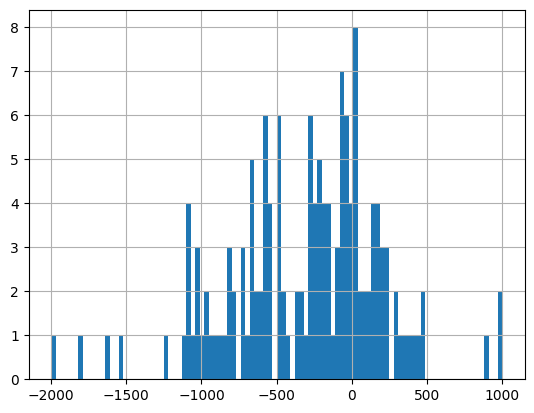

In [26]:
ib_out.loc[ib_out['diff'] < -2000, 'diff'] = -2000
ib_out.loc[ib_out['diff'] > 1000, 'diff'] = 1000
ib_out['diff'].hist(bins=100)

In [27]:
ib_out.drop(['drugs_num', 'len_reg', 'dx_drug_start_int_1', 'diff'], axis=1, inplace=True)
ib_out.head()

,record_id,institution,drugs_list,os_g_status,pfs_m_g_status,tt_os_g_mos,tt_pfs_m_g_mos,sample_id
0,GENIE-DFCI-000971,DFCI,Regorafenib,1,1.0,0.625000,0.361842,GENIE-DFCI-000971-10958
1,GENIE-DFCI-001038,DFCI,Regorafenib,1,1.0,23.223684,3.157895,GENIE-DFCI-001038-7221
2,GENIE-DFCI-002499,DFCI,Cabozantinib Smalate,1,0.0,8.881579,0.921053,GENIE-DFCI-002499-10699
3,GENIE-DFCI-002507,DFCI,Regorafenib,1,1.0,4.802632,2.697368,GENIE-DFCI-002507-4815
4,GENIE-DFCI-002561,DFCI,Regorafenib,1,1.0,10.789474,4.605263,GENIE-DFCI-002561-8631


In [28]:
ib_out['tt_pfs_m_g_mos'].describe()


count    139.000000
mean       3.782421
std        4.927260
min        0.000000
25%        1.365132
50%        2.664474
75%        4.375000
max       43.914474
Name: tt_pfs_m_g_mos, dtype: float64

In [29]:
ib_out['tt_os_g_mos'].describe()


count    147.000000
mean      10.457617
std       10.985006
min        0.000000
25%        3.289474
50%        6.776316
75%       14.473684
max       72.368421
Name: tt_os_g_mos, dtype: float64

In [30]:
print(ib_out['pfs_m_g_status'].value_counts())
ib_out.loc[ib_out['tt_pfs_m_g_mos'] > 6, 'pfs_m_g_status'] = 0
print(ib_out['pfs_m_g_status'].value_counts())


pfs_m_g_status
1.0    99
0.0    40
Name: count, dtype: int64
pfs_m_g_status
1.0    83
0.0    56
Name: count, dtype: int64


In [31]:

print(ib_out['os_g_status'].value_counts())
ib_out.loc[ib_out['tt_os_g_mos'] > 12, 'os_g_status'] = 0
print(ib_out['os_g_status'].value_counts())


os_g_status
1    112
0     35
Name: count, dtype: int64
os_g_status
1    76
0    71
Name: count, dtype: int64


In [32]:
ib_out.to_csv('../data/crc_ib_out.csv', index=True)

In [33]:
data_ib.head()

,PATIENT_ID,START_DATE,STOP_DATE,EVENT_TYPE,TREATMENT_TYPE,AGENT,REGIMEN,REGIMEN_NUMBER,DURATION_DX_START_STOP,CA_SEQ,DRUGS_CT_YN,DRUGS_DC_YN,REDCAP_CA_INDEX
101,GENIE-DFCI-000971,795,795.0,Treatment,Systemic Therapy,Regorafenib,Regorafenib,8,1.0,0,No,Yes,Yes
111,GENIE-DFCI-001038,759,839.0,Treatment,Systemic Therapy,Regorafenib,Regorafenib,4,81.0,0,No,Yes,Yes
227,GENIE-DFCI-002499,1073,1073.0,Treatment,Systemic Therapy,Cabozantinib Smalate,Cabozantinib Smalate,3,1.0,0,Yes,Yes,Yes
250,GENIE-DFCI-002507,2142,2249.0,Treatment,Systemic Therapy,Regorafenib,Regorafenib,8,108.0,0,No,Yes,Yes
313,GENIE-DFCI-002561,1812,1954.0,Treatment,Systemic Therapy,Regorafenib,Regorafenib,8,143.0,0,No,Yes,Yes


In [34]:
keep = ['record_id', 'institution', 'dx_drug_start_int_1', 'os_g_status', 'pfs_m_g_status', 'tt_os_g_mos', 'tt_pfs_m_g_mos']
all_out = other_out[keep]
print(all_out.shape)

(5417, 7)


In [37]:
all_out.reset_index(inplace=True, drop=True)
all_out['sample_id'] = np.NaN
all_out['diff'] = np.NaN

/tmp/ipykernel_2832546/2772580683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_out['sample_id'] = np.NaN
/tmp/ipykernel_2832546/2772580683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_out['diff'] = np.NaN


In [38]:
for i in range(len(all_out)):
    
    record_id = all_out.iloc[i]['record_id']
    panel_rows = panel.loc[panel['record_id'] == record_id]
    panel_rows['diff'] = panel_rows['dx_cpt_rep_days'] - all_out.iloc[i]['dx_drug_start_int_1']
    if len(panel_rows) == 1:
        all_out.iloc[i, all_out.columns.get_loc('sample_id')] = panel_rows.index.values[0]
        all_out.iloc[i, all_out.columns.get_loc('diff')] = panel_rows['diff'].values[0]
    elif len(panel_rows) > 1:
        #use the row with the smallest difference, as long as it's less than 0, unless they are all positive
        if len(panel_rows.loc[panel_rows['diff'] < 0]) == 0:
            panel_rows.sort_values(by=['diff'], inplace=True)
            all_out.iloc[i, all_out.columns.get_loc('sample_id')] = panel_rows.index.values[0]
            all_out.iloc[i, all_out.columns.get_loc('diff')] = panel_rows['diff'].values[0]
        else:
            panel_rows = panel_rows.loc[panel_rows['diff'] < 0]
            panel_rows.sort_values(by=['diff'], inplace=True)
            all_out.iloc[i, all_out.columns.get_loc('sample_id')] = panel_rows.index.values[0]
            all_out.iloc[i, all_out.columns.get_loc('diff')] = panel_rows['diff'].values[0]
all_out.head()

/tmp/ipykernel_2832546/393722704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_rows['diff'] = panel_rows['dx_cpt_rep_days'] - all_out.iloc[i]['dx_drug_start_int_1']
/tmp/ipykernel_2832546/393722704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_rows['diff'] = panel_rows['dx_cpt_rep_days'] - all_out.iloc[i]['dx_drug_start_int_1']
/tmp/ipykernel_2832546/393722704.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

,record_id,institution,dx_drug_start_int_1,os_g_status,pfs_m_g_status,tt_os_g_mos,tt_pfs_m_g_mos,sample_id,diff
0,GENIE-DFCI-000048,DFCI,51,0,NaN,8.980263,NaN,GENIE-DFCI-000048-7508,343.0
1,GENIE-DFCI-000147,DFCI,24,1,NaN,39.835526,NaN,GENIE-DFCI-000147-6898,230.0
2,GENIE-DFCI-000147,DFCI,205,1,NaN,33.881579,NaN,GENIE-DFCI-000147-6898,49.0
3,GENIE-DFCI-000147,DFCI,480,1,1.0,24.835526,6.348684,GENIE-DFCI-000147-6898,-226.0
4,GENIE-DFCI-000147,DFCI,953,1,1.0,9.276316,4.407895,GENIE-DFCI-000147-6898,-699.0


In [39]:
all_out.to_csv('../data/crc_alltx_out.csv', index=True)

In [34]:
clin = pd.read_csv('../data/crc_raw/CRC_2.0-public_clinical_data/patient_level_dataset.csv', index_col='record_id')
clin.head()

,cohort,institution,redacted,birth_year,naaccr_ethnicity_code,naaccr_race_code_primary,naaccr_race_code_secondary,naaccr_race_code_tertiary,race_ethnicity,naaccr_sex_code,...,n_tm_calcitonin_pt,n_tm_cea_pt,n_tm_chromogranin_a_pt,n_tm_ldh_pt,n_tm_psa_pt,n_tm_nse_pt,n_tm_testosterone_pt,n_tm_thyroglobulin_pt,n_cpt_pt,release_version
record_id,,,,,,,,,,,,,,,,,,,,,
GENIE-DFCI-000048,CRC,DFCI,No,1955,Non-Spanish; non-Hispanic,White,No further race documented,No further race documented,Non-Hispanic White,Male,...,0,3,0,0,0,0,0,0,1,2.0-public
GENIE-DFCI-000147,CRC,DFCI,No,1964,Non-Spanish; non-Hispanic,White,No further race documented,No further race documented,Non-Hispanic White,Female,...,0,12,0,0,0,0,0,0,2,2.0-public
GENIE-DFCI-000233,CRC,DFCI,No,1959,Non-Spanish; non-Hispanic,White,No further race documented,No further race documented,Non-Hispanic White,Female,...,0,39,0,0,0,0,0,0,1,2.0-public
GENIE-DFCI-000247,CRC,DFCI,No,1951,Non-Spanish; non-Hispanic,White,No further race documented,No further race documented,Non-Hispanic White,Female,...,0,0,0,0,0,0,0,0,1,2.0-public
GENIE-DFCI-000306,CRC,DFCI,No,1956,Non-Spanish; non-Hispanic,White,No further race documented,No further race documented,Non-Hispanic White,Female,...,0,56,0,0,0,0,0,0,1,2.0-public


In [35]:
keep = ['race_ethnicity', 'naaccr_sex_code', 'n_cpt_pt']
clin = clin[keep]
clin['n_cpt_pt'].value_counts()

n_cpt_pt
1    1425
2      54
3       6
Name: count, dtype: int64

In [36]:
cancer = pd.read_csv('../data/crc_raw/CRC_2.0-public_clinical_data/cancer_level_dataset_index.csv', index_col='record_id')

stage_cols = [col for col in cancer.columns.to_list() if 'stage' in col]
pfs_cols = [col for col in cancer.columns.to_list() if 'pfs' in col]


In [37]:
keep = ['age_dx', 'ca_grade', 'institution', 'stage_dx', 'stage_dx_iv', 'ca_path_group_stage', 'ca_path_t_stage', 'ca_path_n_stage', 'ca_tx_pre_path_stage', 'ca_first_dmets1', 'ca_crc_td', 'ca_crc_crm', 'ca_crc_peri_inv', 'crc_type', 'pfs_i_and_m_adv_status', 'os_dx_status', 'tt_os_dx_days']
cancer = cancer[keep]
print(cancer.shape)
cancer.head()

(1494, 17)


,age_dx,ca_grade,institution,stage_dx,stage_dx_iv,ca_path_group_stage,ca_path_t_stage,ca_path_n_stage,ca_tx_pre_path_stage,ca_first_dmets1,ca_crc_td,ca_crc_crm,ca_crc_peri_inv,crc_type,pfs_i_and_m_adv_status,os_dx_status,tt_os_dx_days
record_id,,,,,,,,,,,,,,,,,
GENIE-DFCI-000048,59,II,DFCI,Stage II,Stage I-III,NaN,NaN,NaN,NaN,NaN,0,20,Perineural invasion present,Right colon,NaN,0,324
GENIE-DFCI-000147,50,II,DFCI,Stage II,Stage I-III,NaN,NaN,NaN,NaN,NaN,0,5,NaN,Rectal,1.0,1,1235
GENIE-DFCI-000233,47,II,DFCI,Stage III,Stage I-III,III,T1,N1,Yes,NaN,Not documented in medical record,16,NaN,Rectal,1.0,1,3303
GENIE-DFCI-000247,63,I,DFCI,Stage IV,Stage IV,NaN,NaN,NaN,NaN,C22.0 Liver,Not applicable: Information not collected for ...,Not applicable,Not applicable,Rectal,1.0,1,1163
GENIE-DFCI-000306,55,II,DFCI,Stage IV,Stage IV,NaN,NaN,NaN,NaN,C34.9 Lung NOS,Not documented in medical record,10,NaN,Right colon,1.0,1,1230


In [38]:
cancer['ca_path_group_stage'].value_counts(dropna=False)

ca_path_group_stage
NaN               1252
IIIB                52
IIIC                33
Unknown             33
IIA                 29
I                   23
III                 20
II                  13
IIB                 12
IIIA                12
Not Applicable       9
IIC                  3
IA                   2
IV                   1
Name: count, dtype: int64

In [39]:
cancer.loc[cancer['ca_path_group_stage'].str.contains('IA', case=False, na=False), 'ca_path_group_stage'] = 'I'
cancer.loc[cancer['ca_path_group_stage'] == 'IIB', 'ca_path_group_stage'] = 'II'
cancer.loc[cancer['ca_path_group_stage'] == 'IIC', 'ca_path_group_stage'] = 'II'
cancer.loc[cancer['ca_path_group_stage'].str.contains('Unknown', na=False), 'ca_path_group_stage'] = np.NaN
cancer.loc[cancer['ca_path_group_stage'].str.contains('Not Applicable', na=False), 'ca_path_group_stage'] = np.NaN
cancer['ca_path_group_stage'].value_counts(dropna=False)

ca_path_group_stage
NaN     1294
I         66
IIIB      52
IIIC      33
II        28
III       20
IV         1
Name: count, dtype: int64

In [40]:
cancer.loc[cancer['ca_tx_pre_path_stage'].str.contains('not', case=False, na=False), 'ca_tx_pre_path_stage'] = 'No'
cancer.loc[cancer['ca_tx_pre_path_stage'].str.contains('Unknown', na=False), 'ca_tx_pre_path_stage'] = np.NaN
cancer['ca_tx_pre_path_stage'] = cancer['ca_tx_pre_path_stage'].fillna('No')
cancer['ca_tx_pre_path_stage'].value_counts(dropna=False)

ca_tx_pre_path_stage
No     1447
Yes      47
Name: count, dtype: int64

In [41]:
cancer['ca_crc_td'].value_counts(dropna=False)

ca_crc_td
0                                                          604
Not applicable: Information not collected for this case    302
Not documented in medical record                           253
Tumor Deposits identified, number unknown                  149
1                                                           65
2                                                           42
3                                                           30
5                                                           11
4                                                           10
6                                                            7
7                                                            4
10                                                           4
9                                                            2
8                                                            2
15                                                           2
19                                           

In [42]:
#if 'ca_crc_td' is a number between >=1, then change it to 1
cancer.loc[(cancer['ca_crc_td'].str.contains('not appl', case=False, na=False), 'ca_crc_td')] = np.NaN
cancer.loc[(cancer['ca_crc_td'].str.contains('not docu', case=False, na=False), 'ca_crc_td')] = np.NaN
cancer.loc[(cancer['ca_crc_td'].str.contains('identified', case=False, na=False), 'ca_crc_td')] = '1'
cancer.loc[(cancer['ca_crc_td'].str.isnumeric()) & (cancer['ca_crc_td'].astype(float) >=1), 'ca_crc_td'] = '1'
cancer['ca_crc_td'].value_counts(dropna=False)

ca_crc_td
0      604
NaN    555
1      335
Name: count, dtype: int64

In [43]:
cancer['ca_crc_crm'].value_counts(dropna=False)

ca_crc_crm
Not documented in medical record                368
Not applicable                                  266
Margins clear distance from tumor not stated    184
0                                                76
No resection of primary site                     49
                                               ... 
83                                                1
39                                                1
31                                                1
28                                                1
89                                                1
Name: count, Length: 79, dtype: int64

In [44]:
cancer.loc[(cancer['ca_crc_crm'].str.contains('No res', case=False, na=False), 'ca_crc_crm')] = -1
cancer.loc[(cancer['ca_crc_crm'].str.contains('Not appl', case=False, na=False), 'ca_crc_crm')] = -1
cancer.loc[(cancer['ca_crc_crm'].str.contains('cannot be assess', case=False, na=False), 'ca_crc_crm')] = -1
cancer.loc[(cancer['ca_crc_crm'].str.contains('Not docu', case=False, na=False), 'ca_crc_crm')] = np.NaN
cancer.loc[(cancer['ca_crc_crm'].str.contains('Margins clear', case=False, na=False), 'ca_crc_crm')] = 1
cancer.loc[(cancer['ca_crc_crm'].str.contains('100 mm', case=False, na=False), 'ca_crc_crm')] = 1
cancer.loc[(cancer['ca_crc_crm'].str.contains('described as', case=False, na=False), 'ca_crc_crm')] = 1
cancer['ca_crc_crm'].value_counts(dropna=False)


ca_crc_crm
NaN    368
-1     328
1      219
0       76
10      29
      ... 
83       1
58       1
33       1
24       1
89       1
Name: count, Length: 73, dtype: int64

In [45]:
cancer.loc[(cancer['ca_crc_crm'].str.isnumeric()) & (cancer['ca_crc_crm'].astype(float) >=1), 'ca_crc_crm'] = 1
cancer['ca_crc_crm'].value_counts(dropna=False)

ca_crc_crm
1      722
NaN    368
-1     328
0       76
Name: count, dtype: int64

In [46]:
cancer.loc[(cancer['ca_crc_peri_inv'].str.contains('Not docu', case=False, na=False), 'ca_crc_peri_inv')] = 'Not present/unknown'
cancer.loc[(cancer['ca_crc_peri_inv'].str.contains('Not appl', case=False, na=False), 'ca_crc_peri_inv')] = 'Not present/unknown'
cancer.loc[(cancer['ca_crc_peri_inv'].str.contains('No histo', case=False, na=False), 'ca_crc_peri_inv')] = 'Not present/unknown'
cancer['ca_crc_peri_inv'] = cancer['ca_crc_peri_inv'].fillna('Not present/unknown')
cancer['ca_crc_peri_inv'].value_counts(dropna=False)

ca_crc_peri_inv
Not present/unknown            1073
Perineural invasion present     421
Name: count, dtype: int64

In [47]:
cancer['crc_type'].value_counts(dropna=False)

crc_type
Rectal         500
Right colon    491
Left colon     436
Other           66
NaN              1
Name: count, dtype: int64

In [48]:
cancer.loc[cancer['crc_type'].isnull()]

,age_dx,ca_grade,institution,stage_dx,stage_dx_iv,ca_path_group_stage,ca_path_t_stage,ca_path_n_stage,ca_tx_pre_path_stage,ca_first_dmets1,ca_crc_td,ca_crc_crm,ca_crc_peri_inv,crc_type,pfs_i_and_m_adv_status,os_dx_status,tt_os_dx_days
record_id,,,,,,,,,,,,,,,,,
GENIE-MSK-P-0020303,51,II,MSK,Stage II,Stage I-III,I,T3,N0,Yes,NaN,0,1,Not present/unknown,NaN,1.0,1,1824


In [49]:
cancer['ca_first_dmets1'].value_counts(dropna=False)

ca_first_dmets1
NaN                                                                   791
C22.0    Liver                                                        488
C34.9    Lung NOS                                                      49
C48.2    Peritoneum NOS                                                45
C48.1    Specified parts of peritoneum                                 29
C56.9    Ovary                                                         23
C77.2    Intra-abdominal lymph nodes                                   11
C76.3    Pelvis NOS                                                     6
C77.0    Lymph nodes of head face and neck                              4
C76.2    Abdomen NOS                                                    4
C77.5    Pelvic lymph nodes                                             4
C77.1    Intrathoracic lymph nodes                                      4
C34.3    Lower lobe lung                                                4
C71.9    Brain NOS    

In [50]:
cancer.loc[cancer['ca_first_dmets1'].str.contains('liver', case=False, na=False), 'ca_first_dmets1'] = 'Liver'
cancer.loc[cancer['ca_first_dmets1'].str.contains('lung', case=False, na=False), 'ca_first_dmets1'] = 'Lung'
cancer.loc[cancer['ca_first_dmets1'].str.contains('intrathoracic', case=False, na=False), 'ca_first_dmets1'] = 'Lung'
cancer.loc[cancer['ca_first_dmets1'].str.contains('perito', case=False, na=False), 'ca_first_dmets1'] = 'Peritoneum'
cancer.loc[cancer['ca_first_dmets1'].str.contains('bone', case=False, na=False), 'ca_first_dmets1'] = 'Other'
cancer.loc[cancer['ca_first_dmets1'].str.contains('vertebr', case=False, na=False), 'ca_first_dmets1'] = 'Other'
cancer.loc[cancer['ca_first_dmets1'].str.contains('abdomen', case=False, na=False), 'ca_first_dmets1'] = 'Other Abdomen/Pelvis'
cancer.loc[cancer['ca_first_dmets1'].str.contains('uterine', case=False, na=False), 'ca_first_dmets1'] = 'Other Abdomen/Pelvis'
cancer.loc[cancer['ca_first_dmets1'].str.contains('pelvis', case=False, na=False), 'ca_first_dmets1'] = 'Other Abdomen/Pelvis'
cancer.loc[cancer['ca_first_dmets1'].str.contains('ovary', case=False, na=False), 'ca_first_dmets1'] = 'Other Abdomen/Pelvis'
cancer.loc[cancer['ca_first_dmets1'].str.contains('pancreas', case=False, na=False), 'ca_first_dmets1'] = 'Other Abdomen/Pelvis'
cancer.loc[cancer['ca_first_dmets1'].str.contains('kidney', case=False, na=False), 'ca_first_dmets1'] = 'Other Abdomen/Pelvis'
cancer.loc[cancer['ca_first_dmets1'].str.contains('renal', case=False, na=False), 'ca_first_dmets1'] = 'Other Abdomen/Pelvis'
cancer.loc[cancer['ca_first_dmets1'].str.contains('bowel', case=False, na=False), 'ca_first_dmets1'] = 'Other Abdomen/Pelvis'
cancer.loc[cancer['ca_first_dmets1'].str.contains('colon', case=False, na=False), 'ca_first_dmets1'] = 'Other Abdomen/Pelvis'
cancer.loc[cancer['ca_first_dmets1'].str.contains('ileum', case=False, na=False), 'ca_first_dmets1'] = 'Other Abdomen/Pelvis'
cancer.loc[cancer['ca_first_dmets1'].str.contains('intest', case=False, na=False), 'ca_first_dmets1'] = 'Other Abdomen/Pelvis'
cancer.loc[cancer['ca_first_dmets1'].str.contains('intest', case=False, na=False), 'ca_first_dmets1'] = 'Other Abdomen/Pelvis'
cancer.loc[cancer['ca_first_dmets1'].str.contains('intra-abd', case=False, na=False), 'ca_first_dmets1'] = 'Other Abdomen/Pelvis'
cancer.loc[cancer['ca_first_dmets1'].str.contains('brain', case=False, na=False), 'ca_first_dmets1'] = 'Other'
cancer.loc[cancer['ca_first_dmets1'].str.contains('head', case=False, na=False), 'ca_first_dmets1'] = 'Other'
cancer.loc[cancer['ca_first_dmets1'].str.contains('inguin', case=False, na=False), 'ca_first_dmets1'] = 'Other Abdomen/Pelvis'
cancer.loc[cancer['ca_first_dmets1'].str.contains('lymph node nos', case=False, na=False), 'ca_first_dmets1'] = 'Other'
cancer.loc[cancer['ca_first_dmets1'].str.contains('pelvic', case=False, na=False), 'ca_first_dmets1'] = 'Other Abdomen/Pelvis'
cancer['ca_first_dmets1'].value_counts(dropna=False)

ca_first_dmets1
NaN                     791
Liver                   488
Peritoneum               74
Other Abdomen/Pelvis     66
Lung                     59
Other                    16
Name: count, dtype: int64

In [51]:
clin.shape

(1485, 3)

In [52]:
cancer.shape

(1494, 17)

In [53]:
clin_pts = clin.index.to_list()
cancer_pts = cancer.index.to_list()
overlap = [pt for pt in clin_pts if pt in cancer_pts]
len(overlap)

1485

In [54]:
#delete duplicate index in cancer
cancer = cancer[~cancer.index.duplicated(keep='first')]

In [55]:
clin = clin.loc[overlap]
cancer = cancer.loc[overlap]
comb = pd.concat([clin, cancer], axis=1)
comb.shape

(1485, 20)

In [56]:
comb.head()

,race_ethnicity,naaccr_sex_code,n_cpt_pt,age_dx,ca_grade,institution,stage_dx,stage_dx_iv,ca_path_group_stage,ca_path_t_stage,ca_path_n_stage,ca_tx_pre_path_stage,ca_first_dmets1,ca_crc_td,ca_crc_crm,ca_crc_peri_inv,crc_type,pfs_i_and_m_adv_status,os_dx_status,tt_os_dx_days
record_id,,,,,,,,,,,,,,,,,,,,
GENIE-DFCI-000048,Non-Hispanic White,Male,1,59,II,DFCI,Stage II,Stage I-III,NaN,NaN,NaN,No,NaN,0,1,Perineural invasion present,Right colon,NaN,0,324
GENIE-DFCI-000147,Non-Hispanic White,Female,2,50,II,DFCI,Stage II,Stage I-III,NaN,NaN,NaN,No,NaN,0,1,Not present/unknown,Rectal,1.0,1,1235
GENIE-DFCI-000233,Non-Hispanic White,Female,1,47,II,DFCI,Stage III,Stage I-III,III,T1,N1,Yes,NaN,NaN,1,Not present/unknown,Rectal,1.0,1,3303
GENIE-DFCI-000247,Non-Hispanic White,Female,1,63,I,DFCI,Stage IV,Stage IV,NaN,NaN,NaN,No,Liver,NaN,-1,Not present/unknown,Rectal,1.0,1,1163
GENIE-DFCI-000306,Non-Hispanic White,Female,1,55,II,DFCI,Stage IV,Stage IV,NaN,NaN,NaN,No,Lung,NaN,1,Not present/unknown,Right colon,1.0,1,1230


In [57]:
comb['crc_type'].value_counts(dropna=False)

crc_type
Rectal         496
Right colon    488
Left colon     434
Other           66
NaN              1
Name: count, dtype: int64

In [58]:
comb.loc[comb['stage_dx'] == 'Stage I-III NOS', 'stage_dx'] = 'Stage III'

In [59]:
#create a function to create a crosstab table with counts and percentages in parentheses
def crosstab_table(col1, col2):
    table = pd.crosstab(comb[col1], comb[col2], margins=True, margins_name='Total')
    table_perc = pd.crosstab(comb[col1], comb[col2], normalize='index', margins=True, margins_name='Total')
    table['Total'] = table['Total'].astype(str)
    table['Total'] = table['Total'].str.replace('Total', 'Total (100%)')
    table_perc = table_perc * 100
    table_perc = table_perc.round(2)
    table_perc = table_perc.astype(str)
    table_perc = table_perc.apply(lambda x: x + '%')
    table = table.astype(str)
    for i in table_perc.index:
        for j in table_perc.columns:
            table.loc[i, j] = table.loc[i, j] + ' (' + table_perc.loc[i, j] + ')'
    return table

In [60]:
crosstab_table('crc_type', 'stage_dx')

stage_dx,Stage I,Stage II,Stage III,Stage IV,Total
crc_type,,,,,
Left colon,24 (5.53%),47 (10.83%),128 (29.49%),235 (54.15%),434
Other,4 (6.06%),7 (10.61%),14 (21.21%),41 (62.12%),66
Rectal,44 (8.89%),72 (14.55%),174 (35.15%),205 (41.41%),495
Right colon,22 (4.51%),95 (19.47%),151 (30.94%),220 (45.08%),488
Total,94 (6.34%),221 (14.9%),467 (31.49%),701 (47.27%),1483


In [61]:
pd.crosstab(comb['stage_dx'], comb['crc_type'], dropna=False)

crc_type,Left colon,Other,Rectal,Right colon
stage_dx,,,,
Stage I,24,4,44,22
Stage II,47,7,72,95
Stage III,128,14,174,151
Stage IV,235,41,205,220


In [62]:
comb['pfs_i_and_m_adv_status'].value_counts(dropna=False)

pfs_i_and_m_adv_status
1.0    1050
0.0     232
NaN     203
Name: count, dtype: int64

In [63]:
comb['os_dx_status'].value_counts(dropna=False)

os_dx_status
0    795
1    690
Name: count, dtype: int64

In [64]:
keep = ['#Patient Identifier', 'Histology Category', 'Histology', 'Derived Grade or Differentiation of Tumor']
pt_data = pd.read_csv('../data/crc_raw/cBioPortal_files/data_clinical_patient.txt', sep='\t', usecols=keep, index_col=0)
pt_data = pt_data.iloc[4:]
pt_data['Derived Grade or Differentiation of Tumor'].fillna('Unknown', inplace=True)
pt_data.head()

,Derived Grade or Differentiation of Tumor,Histology Category,Histology
#Patient Identifier,,,
GENIE-DFCI-000048,II,Adenocarcinoma,"Adenocarcinoma, NOS"
GENIE-DFCI-000147,II,Adenocarcinoma,"Adenocarcinoma, NOS"
GENIE-DFCI-000233,II,Adenocarcinoma,"Adenocarcinoma, NOS"
GENIE-DFCI-000247,I,Adenocarcinoma,"Adenocarcinoma, NOS"
GENIE-DFCI-000306,II,Adenocarcinoma,"Adenocarcinoma, NOS"


In [65]:
pt_data.loc[pt_data['Histology'].str.contains('Mucin', case=False, na=False), 'Histology'] = 'Mucinous'
pt_data.loc[pt_data['Histology'].str.contains('tubulov', case=False, na=False), 'Histology'] = 'TubulovillousVillous'
pt_data.loc[pt_data['Histology'].str.contains('villous', case=False, na=False), 'Histology'] = 'TubulovillousVillous'
pt_data.loc[pt_data['Histology'].str.contains('signet ring', case=False, na=False), 'Histology'] = 'Signet Ring'
pt_data.loc[pt_data['Histology'].str.contains('squamous', case=False, na=False), 'Histology'] = 'Adenosquamous'
pt_data.loc[pt_data['Histology'].str.contains('Sq.', case=False, na=False), 'Histology'] = 'Adenosquamous'
pt_data.loc[pt_data['Histology'].str.contains('Neuroendo', case=False, na=False), 'Histology'] = 'Neuroendocrine'
pt_data.loc[pt_data['Histology'].str.contains('Carcinoid', case=False, na=False), 'Histology'] = 'Neuroendocrine'
pt_data.loc[pt_data['Histology'].str.contains('Mixed', case=False, na=False), 'Histology'] = 'Mixed'
pt_data.loc[pt_data['Histology'].str.contains('Medullary', case=False, na=False), 'Histology'] = 'Medullary'
pt_data.loc[pt_data['Histology'].str.contains('Adenocarcinoma', case=False, na=False), 'Histology'] = 'Adenocarcinoma, NOS'
#if value count is less than 20, replace with 'Other'
histo_vals = pt_data['Histology'].value_counts()
histo_vals[histo_vals < 20]
other_list = list(histo_vals[histo_vals < 20].index)
for i in other_list:
    pt_data.loc[pt_data['Histology'] == i, 'Histology'] = 'Other'
pt_data['Histology'].value_counts(dropna=False)

Histology
Adenocarcinoma, NOS     1059
NaN                      214
Mucinous                 103
TubulovillousVillous      63
Other                     27
Signet Ring               20
Name: count, dtype: int64

In [66]:
comb['Histology Category'] = np.NaN
comb['Histology'] = np.NaN
comb['Derived Grade or Differentiation of Tumor'] = np.NaN
#use update to fill comb with data from pt_data
comb.update(pt_data)
comb.head()

,race_ethnicity,naaccr_sex_code,n_cpt_pt,age_dx,ca_grade,institution,stage_dx,stage_dx_iv,ca_path_group_stage,ca_path_t_stage,...,ca_crc_td,ca_crc_crm,ca_crc_peri_inv,crc_type,pfs_i_and_m_adv_status,os_dx_status,tt_os_dx_days,Histology Category,Histology,Derived Grade or Differentiation of Tumor
record_id,,,,,,,,,,,,,,,,,,,,,
GENIE-DFCI-000048,Non-Hispanic White,Male,1,59,II,DFCI,Stage II,Stage I-III,NaN,NaN,...,0,1,Perineural invasion present,Right colon,NaN,0,324,Adenocarcinoma,"Adenocarcinoma, NOS",II
GENIE-DFCI-000147,Non-Hispanic White,Female,2,50,II,DFCI,Stage II,Stage I-III,NaN,NaN,...,0,1,Not present/unknown,Rectal,1.0,1,1235,Adenocarcinoma,"Adenocarcinoma, NOS",II
GENIE-DFCI-000233,Non-Hispanic White,Female,1,47,II,DFCI,Stage III,Stage I-III,III,T1,...,NaN,1,Not present/unknown,Rectal,1.0,1,3303,Adenocarcinoma,"Adenocarcinoma, NOS",II
GENIE-DFCI-000247,Non-Hispanic White,Female,1,63,I,DFCI,Stage IV,Stage IV,NaN,NaN,...,NaN,-1,Not present/unknown,Rectal,1.0,1,1163,Adenocarcinoma,"Adenocarcinoma, NOS",I
GENIE-DFCI-000306,Non-Hispanic White,Female,1,55,II,DFCI,Stage IV,Stage IV,NaN,NaN,...,NaN,1,Not present/unknown,Right colon,1.0,1,1230,Adenocarcinoma,"Adenocarcinoma, NOS",II


In [67]:
cea_data = pd.read_csv('../data/crc_raw/CRC_2.0-public_clinical_data/tm_level_dataset.csv', index_col='record_id')
print(cea_data.shape)
cea_data.head()

(24462, 13)


,cohort,institution,tm_number,tm_spec_collect_int,dx_tm_days,dx_tm_mos,dx_tm_yrs,tm_type,tm_num_result,tm_result_units,tm_normal_range_lower,tm_normal_range_upper,release_version
record_id,,,,,,,,,,,,,
GENIE-DFCI-000048,CRC,DFCI,1,21737,23,0.756579,0.062971,CEA,0.0,ng/mL,0.0,2.5,2.0-public
GENIE-DFCI-000048,CRC,DFCI,2,21945,231,7.598684,0.632444,CEA,0.0,ng/mL,0.0,2.5,2.0-public
GENIE-DFCI-000048,CRC,DFCI,3,22038,324,10.657895,0.887064,CEA,0.5,ng/mL,0.0,2.5,2.0-public
GENIE-DFCI-000147,CRC,DFCI,1,18985,464,15.263158,1.270363,CEA,2.8,ng/mL,0.0,2.5,2.0-public
GENIE-DFCI-000147,CRC,DFCI,2,19194,673,22.138158,1.842574,CEA,3.7,ng/mL,0.0,2.5,2.0-public


In [68]:
cea_data = cea_data.loc[cea_data['tm_number'] == 1]
print(cea_data.shape)
cea_data.head()

(1261, 13)


,cohort,institution,tm_number,tm_spec_collect_int,dx_tm_days,dx_tm_mos,dx_tm_yrs,tm_type,tm_num_result,tm_result_units,tm_normal_range_lower,tm_normal_range_upper,release_version
record_id,,,,,,,,,,,,,
GENIE-DFCI-000048,CRC,DFCI,1,21737,23,0.756579,0.062971,CEA,0.0,ng/mL,0.0,2.5,2.0-public
GENIE-DFCI-000147,CRC,DFCI,1,18985,464,15.263158,1.270363,CEA,2.8,ng/mL,0.0,2.5,2.0-public
GENIE-DFCI-000233,CRC,DFCI,1,18383,1193,39.243421,3.266256,CEA,1.0,ng/mL,0.0,2.5,2.0-public
GENIE-DFCI-000306,CRC,DFCI,1,20387,15,0.493421,0.041068,CEA,0.7,ng/mL,NaN,NaN,2.0-public
GENIE-DFCI-000311,CRC,DFCI,1,30016,38,1.250000,0.104038,CEA,0.0,ng/mL,0.0,2.5,2.0-public


In [69]:
comb['CEA'] = np.NaN
cea_data.rename(columns={'tm_num_result': 'CEA'}, inplace=True)
comb.update(cea_data)
comb['CEA'].notnull().sum()

1260

<Axes: >

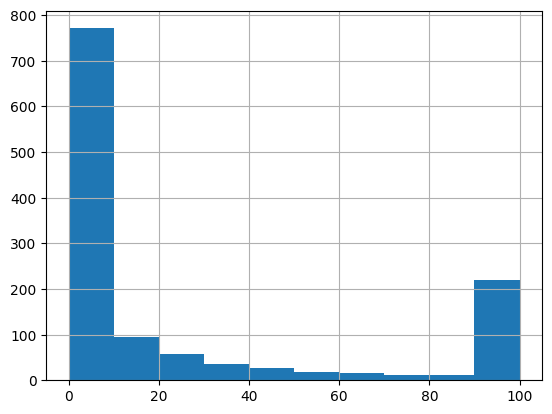

In [70]:
comb.loc[comb['CEA'] > 100, 'CEA'] = 100
comb['CEA'].hist()

In [71]:
comb.head()

,race_ethnicity,naaccr_sex_code,n_cpt_pt,age_dx,ca_grade,institution,stage_dx,stage_dx_iv,ca_path_group_stage,ca_path_t_stage,...,ca_crc_crm,ca_crc_peri_inv,crc_type,pfs_i_and_m_adv_status,os_dx_status,tt_os_dx_days,Histology Category,Histology,Derived Grade or Differentiation of Tumor,CEA
record_id,,,,,,,,,,,,,,,,,,,,,
GENIE-DFCI-000048,Non-Hispanic White,Male,1,59,II,DFCI,Stage II,Stage I-III,NaN,NaN,...,1,Perineural invasion present,Right colon,NaN,0,324,Adenocarcinoma,"Adenocarcinoma, NOS",II,0.0
GENIE-DFCI-000147,Non-Hispanic White,Female,2,50,II,DFCI,Stage II,Stage I-III,NaN,NaN,...,1,Not present/unknown,Rectal,1.0,1,1235,Adenocarcinoma,"Adenocarcinoma, NOS",II,2.8
GENIE-DFCI-000233,Non-Hispanic White,Female,1,47,II,DFCI,Stage III,Stage I-III,III,T1,...,1,Not present/unknown,Rectal,1.0,1,3303,Adenocarcinoma,"Adenocarcinoma, NOS",II,1.0
GENIE-DFCI-000247,Non-Hispanic White,Female,1,63,I,DFCI,Stage IV,Stage IV,NaN,NaN,...,-1,Not present/unknown,Rectal,1.0,1,1163,Adenocarcinoma,"Adenocarcinoma, NOS",I,NaN
GENIE-DFCI-000306,Non-Hispanic White,Female,1,55,II,DFCI,Stage IV,Stage IV,NaN,NaN,...,1,Not present/unknown,Right colon,1.0,1,1230,Adenocarcinoma,"Adenocarcinoma, NOS",II,0.7


In [72]:
path = pd.read_csv('../data/crc_raw/CRC_2.0-public_clinical_data/pathology_report_level_dataset.csv', index_col='record_id')
print(path.shape)
path.head()

(7156, 319)


/tmp/ipykernel_2824145/1948899811.py:1: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,194,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,239,247,250,256,259,265,268,272,273,277,282,300,303,306,309,312,314,315,317) have mixed types. Specify dtype option on import or set low_memory=False.
  path = pd.read_csv('../data/crc_raw/CRC_2.0-public_clinical_data/pathology_report_level_dataset.csv', index_col='record_id')


,cohort,institution,path_proc_number,path_rep_number,path_proc_inst,path_rep_inst,path_proc_int,dx_path_proc_days,dx_path_proc_mos,dx_path_proc_yrs,...,mmr_result,mmr_result_2,mmr_result_3,mmrp_det,mmrp_det_2,mmrp_det_3,mmrd_det,mmrd_det_2,mmrd_det_3,release_version
record_id,,,,,,,,,,,,,,,,,,,,,
GENIE-DFCI-000048,CRC,DFCI,1,1,External institution,External institution,21714,0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0-public
GENIE-DFCI-000048,CRC,DFCI,1,2,External institution,Internal institution,21714,0,0.000000,0.000000,...,No loss of nuclear expression of MMR proteins:...,NaN,NaN,"No loss of nuclear expression of MLH1, MSH2, M...",NaN,NaN,NaN,NaN,NaN,2.0-public
GENIE-DFCI-000147,CRC,DFCI,1,1,External institution,Internal institution,18521,0,0.000000,0.000000,...,No loss of nuclear expression of MMR proteins:...,NaN,NaN,"No loss of nuclear expression of MLH1, MSH2, M...",NaN,NaN,NaN,NaN,NaN,2.0-public
GENIE-DFCI-000147,CRC,DFCI,2,1,Internal institution,Internal institution,18654,133,4.375000,0.364134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0-public
GENIE-DFCI-000147,CRC,DFCI,3,1,Internal institution,Internal institution,19200,679,22.335526,1.859001,...,No loss of nuclear expression of MMR proteins:...,NaN,NaN,"No loss of nuclear expression of MLH1, MSH2, M...",NaN,NaN,NaN,NaN,NaN,2.0-public


In [74]:
path['msi_testing'].value_counts(dropna=False)

msi_testing
No     6828
Yes     328
Name: count, dtype: int64

In [75]:
path['msi_result'].value_counts(dropna=False)

msi_result
NaN                                                             6828
MSS: STABLE                                                      284
MSI-H: HIGH                                                       26
MSI-L: LOW or instability in < 30% of microsatellite markers      15
Indeterminate/Not stated                                           3
Name: count, dtype: int64

In [106]:
comb.rename({'pfs_i_and_m_adv_status': 'PFS', 'os_dx_status': 'OS', 'tt_os_dx_days': 'OS_time'}, axis=1, inplace=True)

In [107]:
comb.to_csv('../data/crc_clin_pub.csv', index=True)